# KERNEL CLEAN

In [1]:
%reset -f -s

import gc

# LIBRARIES IMPORT

In [2]:
# imports

import fig_lib 
import CNN_lib
import CNN_utilities
import numpy as np
import matplotlib.pyplot as plt
import pickle

from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [3]:
# p

pkl_d_p = 'C:\PROJECTS\emboendo\CNN/input_d.pkl'
pkl_train_p='C:\PROJECTS\emboendo\CNN/train_d.pkl'        

In [4]:
# ------- PROCESS DICOM DATA --------------

load_dicom_d=True

# ------- GENERATE SYNTHETIC DATA --------------

load_synth_d=False


# --------- DATA TYPE ------------

video_d=True                                    # Video = True , Image = False 

# DATA LOAD

In [5]:

if load_dicom_d: 

        with open(pkl_d_p, 'rb') as pikle_file:
            input_d = pickle.load(pikle_file)
       


In [6]:
if load_dicom_d:    
    
    print('FIRST LAYER KEYS:', list(input_d.keys()))
    print('SECOND LAYER KEYS:',list(input_d[list(input_d.keys())[0]].keys()))
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[0]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]]),'Example:',input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[0]].keys())[0]])
    print(f' KEY TYPE "{list(input_d[list(input_d.keys())[0]].keys())[1]}":',type(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]),'Example shape:',np.shape(input_d[list(input_d.keys())[0]][list(input_d[list(input_d.keys())[1]].keys())[1]]))
    


FIRST LAYER KEYS: ['I0', 'I1', 'I2', 'I9', 'I11', 'I24', 'I25', 'I26', 'I27', 'I28', 'I33', 'I38', 'I39', 'I40', 'I42', 'I44', 'I45', 'I47', 'I49', 'I50', 'I51', 'I53', 'I54', 'I56', 'I57', 'I58', 'I61', 'I63', 'I64', 'I65', 'I66', 'I67', 'I70', 'I71', 'I72', 'I73', 'I77', 'I86', 'I87', 'I89', 'I90', 'I91', 'I92', 'I93', 'I94', 'I95', 'I101', 'I102', 'I103', 'I104', 'I107', 'I111', 'I112', 'I115', 'I116', 'I117', 'I119', 'I120', 'I121', 'I123', 'I124', 'I125', 'I126', 'I127', 'I131', 'I146', 'I147', 'I154', 'I157', 'I159', 'I161', 'I163', 'I164', 'I165', 'I167', 'I168', 'I169', 'I172', 'I174', 'I176', 'I177', 'I178', 'I179', 'I180', 'I181', 'I182', 'I187', 'I189', 'I191', 'I200', 'I201', 'I202', 'I203', 'I204', 'I208', 'I209', 'I212', 'I213', 'I215', 'I216', 'I218', 'I230', 'I238', 'I240', 'I243', 'I252', 'I254', 'I255', 'I257', 'I259', 'I261', 'I262', 'I263', 'I264', 'I265', 'I266', 'I267', 'I268', 'I269', 'I270', 'I278', 'I279', 'I281', 'I283', 'I284', 'I285', 'I286', 'I292', 'I294',

In [7]:
# check 
if True:    
    if load_dicom_d:
        print('RECORD - LABEL - SHAPE')

        for R in input_d.keys():
            print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))
    

RECORD - LABEL - SHAPE
I0 0 (39, 600, 800) <class 'numpy.ndarray'>
I1 0 (40, 600, 800) <class 'numpy.ndarray'>
I2 0 (40, 600, 800) <class 'numpy.ndarray'>
I9 0 (40, 600, 800) <class 'numpy.ndarray'>
I11 0 (40, 600, 800) <class 'numpy.ndarray'>
I24 0 (23, 434, 636) <class 'numpy.ndarray'>
I25 0 (23, 434, 636) <class 'numpy.ndarray'>
I26 0 (21, 434, 636) <class 'numpy.ndarray'>
I27 0 (23, 434, 636) <class 'numpy.ndarray'>
I28 0 (23, 434, 636) <class 'numpy.ndarray'>
I33 0 (24, 434, 636) <class 'numpy.ndarray'>
I38 0 (24, 434, 636) <class 'numpy.ndarray'>
I39 0 (24, 434, 636) <class 'numpy.ndarray'>
I40 0 (20, 434, 636) <class 'numpy.ndarray'>
I42 0 (22, 434, 636) <class 'numpy.ndarray'>
I44 0 (23, 434, 636) <class 'numpy.ndarray'>
I45 0 (24, 434, 636) <class 'numpy.ndarray'>
I47 0 (23, 434, 636) <class 'numpy.ndarray'>
I49 0 (23, 434, 636) <class 'numpy.ndarray'>
I50 0 (39, 422, 636) <class 'numpy.ndarray'>
I51 0 (39, 422, 636) <class 'numpy.ndarray'>
I53 0 (39, 422, 636) <class 'numpy.n

In [8]:
# -------- DATA PARAMS --------               

if load_synth_d:   pass
    

In [9]:
#input_d, eval_d

if load_synth_d:pass

In [10]:
print('RECORD - LABEL - SHAPE')

if load_synth_d:pass

RECORD - LABEL - SHAPE


# CHECK DATA

In [11]:
if load_dicom_d:
    t_btw_frm=0.05
    d_plt_check,rec_check=False,'I0'
    print(input_d[rec_check]['label'])


0


In [12]:
# check video
if load_dicom_d:
    if d_plt_check:

        if video_d:fig_lib.vid_show(input_d[rec_check]['image'],t_btw_frm=t_btw_frm)
        else:fig_lib.im_show(input_d[rec_check]['image'])



# CNN

### GENERATE TRAIN DATA

In [13]:
# X_train,Y_train

with open(pkl_train_p, 'rb') as pikle_file:

    save_trains= pickle.load(pikle_file)

X_train,Y_train =  save_trains[0],save_trains[1]

    
max_frm_n, HEIGHT, WIDTH=np.shape(X_train)[1],np.shape(X_train)[2],np.shape(X_train)[3]

In [14]:
# X_train,Y_train,X_eval,Y_eval

test_size=0.2
X_train, X_eval, Y_train, Y_eval = train_test_split(X_train, Y_train, test_size=test_size) #,random_state=42)

print('Train data:',len(Y_train),'Evaluation data:',len(Y_eval))

Train data: 394 Evaluation data: 99


 Train data shape: (394, 40, 150, 150, 1)  Validation data shape: (99, 40, 150, 150, 1)


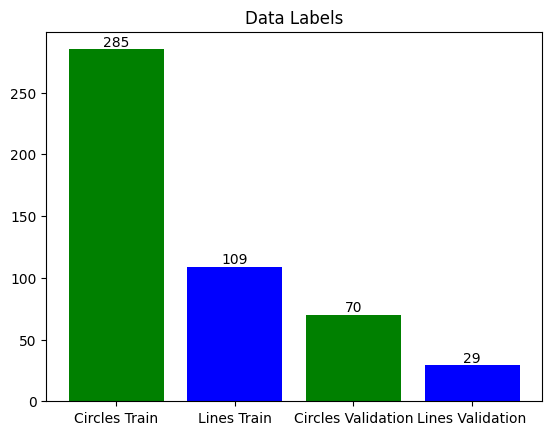

In [15]:
# check data

zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)
zeros_count_val = np.sum(Y_eval == 0)
ones_count_val = np.sum(Y_eval == 1)

labels = ['Circles Train', 'Lines Train','Circles Validation', 'Lines Validation']
print(' Train data shape:', np.shape(X_train),' Validation data shape:', np.shape(X_eval))

plt.bar(labels, [zeros_count, ones_count,zeros_count_val,ones_count_val], color=['green', 'blue','green', 'blue'])

for i, count in enumerate([zeros_count, ones_count,zeros_count_val,ones_count_val]):

    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Data Labels')
plt.show()

### PARAMETERS

In [16]:
print('LIBRARY MODELS:')
print(' ')

for model_name in CNN_lib.MODELS.values(): print(model_name)

LIBRARY MODELS:
 
image_full
image_conv
image_conv_augmentation
video_conv2D
video_conv3D


In [17]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'video_conv2D'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epch=15


### MODEL

In [18]:
gc.collect()

2877

In [19]:
# MODEL 

if model_from_CNN_lib:
  
  if video_d: model = CNN_lib.lib_models(mdl,im_input_shp=(max_frm_n, HEIGHT, WIDTH, 1))
  else: model = CNN_lib.lib_models(mdl,im_input_shp=(HEIGHT, WIDTH,1))

else:

  model = models.Sequential([
          layers.Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu',input_shape=(max_frm_n, HEIGHT, WIDTH, 1)),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(1, 3, 3),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(1, 3, 3),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=64, kernel_size=(1, 3, 3),  activation='relu'),
          layers.Flatten(),
          layers.Dense(64, activation='relu'),
          layers.Dense(1,activation='sigmoid')
          ])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 38, 148, 148, 16   448       
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 19, 74, 74, 16)    0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 19, 72, 72, 32)    4640      
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 9, 36, 36, 32)     0         
 g3D)                                                            
                                                                 
 conv3d_2 (Conv3D)           (None, 9, 34, 34, 32)     9248      
                                                       

In [20]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

### TRAINNING

In [21]:
history =model.fit(X_train, Y_train, epochs=epch, validation_data=(X_eval,Y_eval))

Epoch 1/15


13/13 [==============================] - 20s 1s/step - loss: 18.6729 - accuracy: 0.5990 - val_loss: 0.6184 - val_accuracy: 0.7071
Epoch 2/15
13/13 [==============================] - 17s 1s/step - loss: 0.5453 - accuracy: 0.7234 - val_loss: 0.5358 - val_accuracy: 0.7071
Epoch 3/15
13/13 [==============================] - 17s 1s/step - loss: 0.4767 - accuracy: 0.7234 - val_loss: 0.5216 - val_accuracy: 0.7071
Epoch 4/15
13/13 [==============================] - 17s 1s/step - loss: 0.3957 - accuracy: 0.7234 - val_loss: 0.5118 - val_accuracy: 0.7071
Epoch 5/15
13/13 [==============================] - 17s 1s/step - loss: 0.3182 - accuracy: 0.7792 - val_loss: 0.5829 - val_accuracy: 0.6869
Epoch 6/15
13/13 [==============================] - 17s 1s/step - loss: 0.3145 - accuracy: 0.9061 - val_loss: 0.4908 - val_accuracy: 0.7980
Epoch 7/15
13/13 [==============================] - 17s 1s/step - loss: 0.3088 - accuracy: 0.9213 - val_loss: 0.6387 - val_accuracy: 0.7071
Epoch 8/15
13/13 

### EVALUATE MODEL

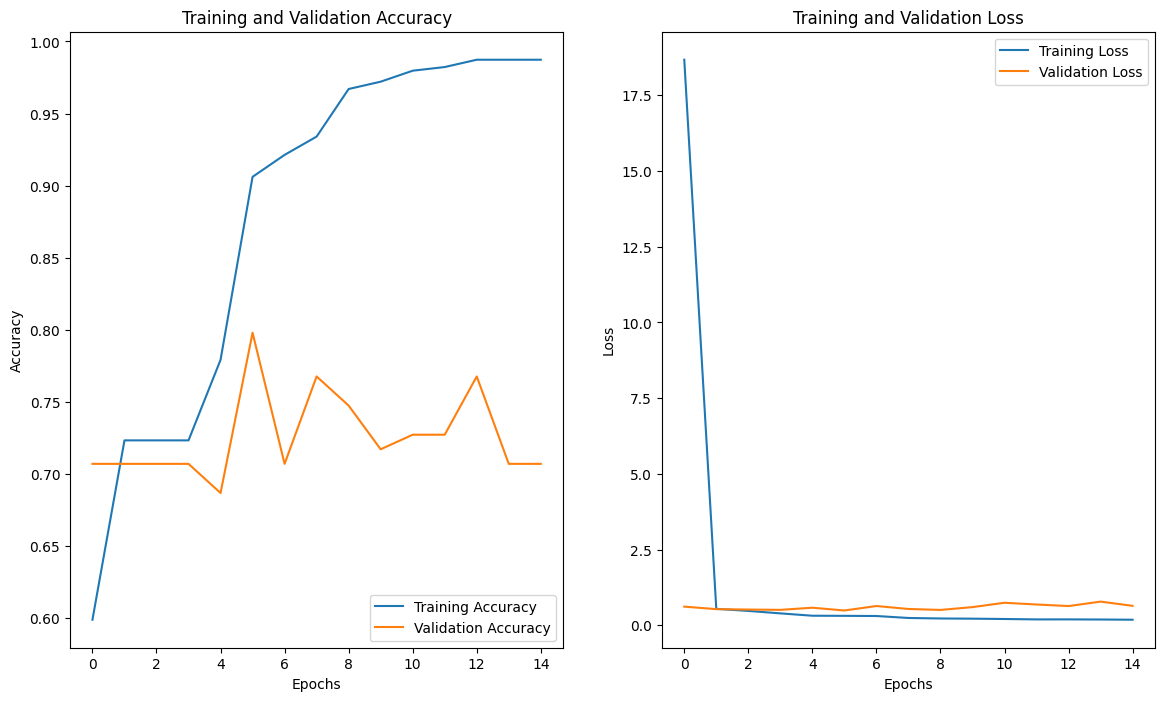

In [22]:
fg_size=(14,8)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epch)

plt.figure(figsize=fg_size)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

4/4 - 1s - loss: 0.6446 - accuracy: 0.7071 - 1s/epoch - 294ms/step
Loss: 0.6445587873458862 Accuracy: 0.7070707082748413


In [24]:
performance_d={'NAME':mdl,
               'ACCURACY':test_accuracy,
               'LOSS':test_loss,
               'VIDEO':video_d,
               'EPOCHS':epch,
               'HEIGHT':HEIGHT,
               'WIDTH':WIDTH}

performance_d

{'NAME': 'video_conv2D',
 'ACCURACY': 0.7070707082748413,
 'LOSS': 0.6445587873458862,
 'VIDEO': True,
 'EPOCHS': 15,
 'HEIGHT': 150,
 'WIDTH': 150}